In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/grocery-sales-dataset/countries.csv
/kaggle/input/grocery-sales-dataset/products.csv
/kaggle/input/grocery-sales-dataset/categories.csv
/kaggle/input/grocery-sales-dataset/cities.csv
/kaggle/input/grocery-sales-dataset/employees.csv
/kaggle/input/grocery-sales-dataset/sales.csv
/kaggle/input/grocery-sales-dataset/customers.csv


## Sampling and Merging the CSVs file

In [3]:
%%writefile sample_and_merge.py

import pandas as pd

def sample_and_merge(sample_size=100_000):
    data_path = "/kaggle/input/grocery-sales-dataset"

    # Load CSVs
    sales = pd.read_csv(f"{data_path}/sales.csv")
    products = pd.read_csv(f"{data_path}/products.csv")
    customers = pd.read_csv(f"{data_path}/customers.csv")
    categories = pd.read_csv(f"{data_path}/categories.csv")
    cities = pd.read_csv(f"{data_path}/cities.csv")
    countries = pd.read_csv(f"{data_path}/countries.csv")
    employees = pd.read_csv(f"{data_path}/employees.csv")

    # Sample manageable subset
    sales_sample = sales.sample(n=sample_size, random_state=42)

    # Merge all dataframes
    merged_df = (
        sales_sample
        .merge(products, on="ProductID", how="left")
        .merge(customers, on="CustomerID", how="left")
        .merge(categories, on="CategoryID", how="left")
        .merge(cities, on="CityID", how="left")
        .merge(countries, on="CountryID", how="left")
    )

    return merged_df


Writing sample_and_merge.py


## Loading Sample and Merge dataset

In [4]:
import importlib
import sample_and_merge
importlib.reload(sample_and_merge)

merged_df = sample_and_merge.sample_and_merge(sample_size=100_000)

## 1. Basic Overview

In [5]:
# size and shape
print("Rows:", merged_df.shape[0])
print("Columns:", merged_df.shape[1])

# Columns Overviews
print("\nColumns overview:\n", merged_df.columns)

# Data types and missing values
print("\nData types and Missing Values\n")
print(merged_df.info())

# Sample 5 rows
print("Sample 5 rows")
print(merged_df.head())

Rows: 100000
Columns: 28

Columns overview:
 Index(['SalesID', 'SalesPersonID', 'CustomerID', 'ProductID', 'Quantity',
       'Discount', 'TotalPrice', 'SalesDate', 'TransactionNumber',
       'ProductName', 'Price', 'CategoryID', 'Class', 'ModifyDate',
       'Resistant', 'IsAllergic', 'VitalityDays', 'FirstName', 'MiddleInitial',
       'LastName', 'CityID', 'Address', 'CategoryName', 'CityName', 'Zipcode',
       'CountryID', 'CountryName', 'CountryCode'],
      dtype='object')

Data types and Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SalesID            100000 non-null  int64  
 1   SalesPersonID      100000 non-null  int64  
 2   CustomerID         100000 non-null  int64  
 3   ProductID          100000 non-null  int64  
 4   Quantity           100000 non-null  int64  
 5   Discount           10000

## 2. Checking Missing Values and Duplicates

In [6]:
# missing values
print("\nMissing Values per Column:\n", merged_df.isnull().sum())

# Percentage missing
missing_percent =  (merged_df.isna().mean() * 100).round(2)
print("\nMissing Values (%):\n", missing_percent)

# Duplicates
print("\nDuplicates rows:\n", merged_df.duplicated().sum())



Missing Values per Column:
 SalesID                 0
SalesPersonID           0
CustomerID              0
ProductID               0
Quantity                0
Discount                0
TotalPrice              0
SalesDate             973
TransactionNumber       0
ProductName             0
Price                   0
CategoryID              0
Class                   0
ModifyDate              0
Resistant               0
IsAllergic              0
VitalityDays            0
FirstName               0
MiddleInitial        1016
LastName                0
CityID                  0
Address                 0
CategoryName            0
CityName                0
Zipcode                 0
CountryID               0
CountryName             0
CountryCode             0
dtype: int64

Missing Values (%):
 SalesID              0.00
SalesPersonID        0.00
CustomerID           0.00
ProductID            0.00
Quantity             0.00
Discount             0.00
TotalPrice           0.00
SalesDate            0.97


In [7]:
# Cleaning the date by Imputing most occurance values in missing data columns
merged_df.fillna({
   'SalesDate': merged_df['SalesDate'].mode()[0],
   'MiddleInitial': merged_df['MiddleInitial'].mode()[0]
}, inplace=True)

In [8]:
# Convert SalesDate to datetime object
merged_df['SalesDate'] = pd.to_datetime(merged_df['SalesDate'], errors ='coerce')

# Create Month and Day Columns
merged_df['Month'] = merged_df['SalesDate'].dt.month_name()
merged_df['Day'] = merged_df['SalesDate'].dt.day_name()

## 3. Descriptive Statistics

In [9]:
merged_df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
SalesID,100000.0,NaN,NaN,NaN,3373902.90967,14.0,1680246.5,3369084.0,5066678.75,6758121.0,1950549.564714
SalesPersonID,100000.0,NaN,NaN,NaN,12.01016,1.0,6.0,12.0,18.0,23.0,6.63185
CustomerID,100000.0,NaN,NaN,NaN,49556.57303,1.0,24928.0,49635.0,74335.0,98756.0,28549.972155
ProductID,100000.0,NaN,NaN,NaN,226.84454,1.0,114.0,227.0,340.0,452.0,130.280203
Quantity,100000.0,NaN,NaN,NaN,13.04586,1.0,7.0,13.0,19.0,25.0,7.220989
Discount,100000.0,NaN,NaN,NaN,0.029776,0.0,0.0,0.0,0.0,0.2,0.063808
TotalPrice,100000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SalesDate,100000,NaN,NaN,NaN,2018-03-05 20:34:37.678884352,2018-01-01 00:01:58.510000,2018-02-01 03:53:49.155000064,2018-03-05 21:33:00.860000,2018-04-07 11:18:22.002500096,2018-05-09 23:58:54.090000,NaN
TransactionNumber,100000,100000,XJT3G8AY1MBCW4MSD67M,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductName,100000,452,"Lemonade - Natural, 591 Ml",270,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Exploratory Data Analysis

In [10]:
import matplotlib.pyplot as plt


In [11]:
total_sales = round(merged_df['Price'].sum(), 2)
print('Total Sales:', total_sales)
print('Total Transactions:', len(merged_df))

Total Sales: 5082301.81
Total Transactions: 100000


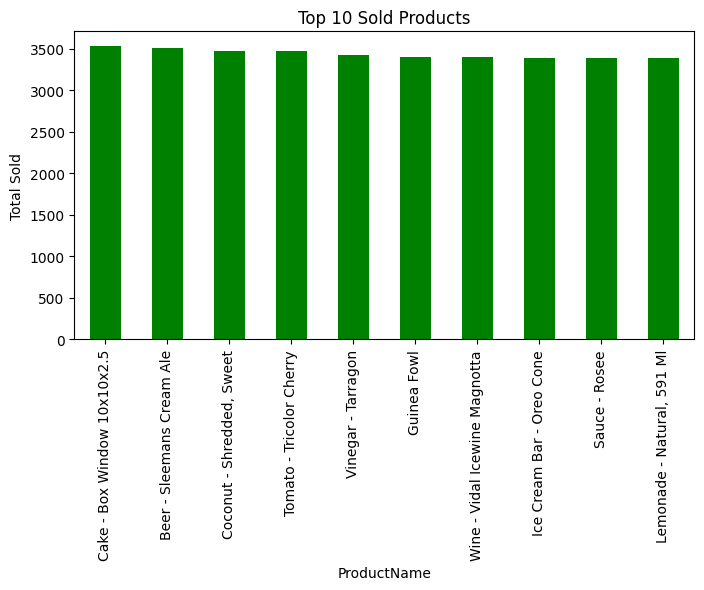

In [12]:
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='green', figsize=(8, 4), title='Top 10 Sold Products')
plt.ylabel('Total Sold')
plt.show()


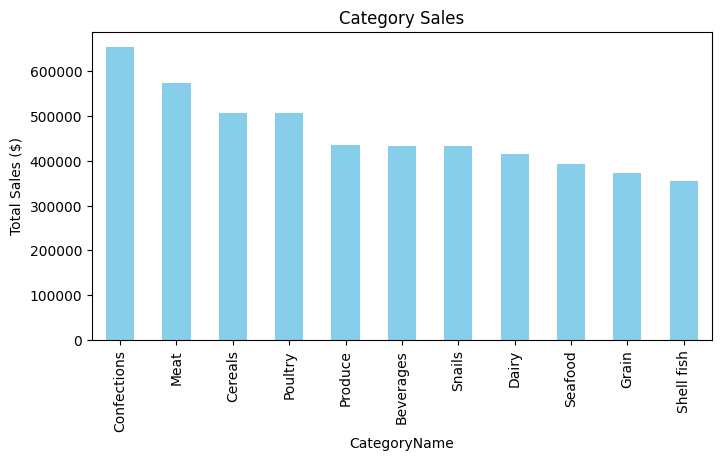

In [14]:
category_products = merged_df.groupby('CategoryName')['Price'].sum().sort_values(ascending=False)
category_products.plot(kind='bar', color='skyblue', title='Category Sales', figsize=(8, 4))
plt.ylabel('Total Sales ($)')
plt.show()

## 5. KEY INSIGHTS

In [21]:
print('Total Sales:', total_sales)
print('Best Selling Product:', top_products.index[0])
print('Most Selling Category:', category_products.idxmax())
print('Month with Highest Sales:', merged_df.groupby('Month')['Price'].sum().idxmax())


Total Sales: 5082301.81
Best Selling Product: Cake - Box Window 10x10x2.5
Most Selling Category: Confections
Month with Highest Sales: January


## 6. Final Step: Save Cleaned & Merged Data

In [22]:
merged_df.to_csv("/kaggle/working/cleaned_grocery_sales.csv", index=False)
print("✅ Cleaned data saved successfully!")


✅ Cleaned data saved successfully!
